<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_4/02-construtora_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2) Uma construtora está avaliando novas técnicas construtivas para a condução de suas obras.
A  ideia  seria  de  usar  blocos  de  concreto  armado  pré-moldados  ao  invés  de  trabalhar  com  a
moldagem de concreto na obra. Teoricamente, esta estratégia poderia ser benéfica, pois o bloco
pode ser mais rentável que o concreto.  
Para avaliar essas estratégias, ela então decide coletar dados das suas últimas 18 obras em uma
região e ver se a utilização de mais blocos de fato gerou uma melhoria. De sua análise financeira,
eles buscaram que o custo com o metro cúbico de concreto (para a formulação e moldagem) é
de R$ 240,00 por m³, enquanto o preço do milheiro (mil unidades) de bloco é de R$ 560,00.  
Os dados estão na planilha Green_Belt_FM2S_Lista_Exercícios_03_e_04, na aba
02.Construtora.

| **Coluna da Worksheet** | **Descrição** |
|--------------------------|---------------|
| **Concreto**             | Valor em m³ de cimento utilizado na construção. |
| **Blocos Armados**       | Centenas de blocos de concreto armado pré-moldados utilizados na construção. |

---

**Responda:**

**a)** Avalie um modelo de regressão para como o número de blocos impacta no consumo de
concreto.

**b)** Avalie um modelo de regressão do número de blocos com o custo total.

**c)** Qual deve ser a relação mínima entre os preços do concreto e do bloco para que seja
viável a substituição?

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [11]:
url = '/content/[FM2S] Lista_Exercícios_ 3 e 4.xlsx'
pd.ExcelFile(url).sheet_names

['1.Teste_Medicamento', '2.Construtora', '3.Condicionamento_Físico']

In [12]:
dados_construtora = pd.read_excel(url, sheet_name='2.Construtora') # dados_construtora = pd.read_excel(url, sheet_name=1)

In [13]:
print(dados_construtora.head())
print(dados_construtora.describe())
print(dados_construtora.info())

   Quantidade de Concreto (m³)  Quantidade de blocos (centenas)
0                           82                               71
1                           91                               64
2                          100                               43
3                           68                               67
4                           87                               56
       Quantidade de Concreto (m³)  Quantidade de blocos (centenas)
count                    18.000000                        18.000000
mean                     85.000000                        61.555556
std                      13.826658                        11.267978
min                      65.000000                        43.000000
25%                      76.250000                        53.750000
50%                      81.000000                        64.500000
75%                      95.500000                        70.250000
max                     116.000000                        78.000000
<cla

In [17]:
data = {
    'Concreto_m3': [82, 91, 100, 68, 87, 73, 78, 80, 65, 84, 116, 76, 97, 100, 105, 77, 73, 78],
    'Blocos_centenas': [71, 64, 43, 67, 56, 73, 68, 56, 76, 65, 45, 58, 45, 53, 49, 78, 73, 68]
}
df = pd.DataFrame(data)

**a)** Avalie um modelo de regressão para como o número de blocos impacta no consumo de concreto.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:            Concreto_m3   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     37.34
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           1.50e-05
Time:                        17:27:17   Log-Likelihood:                -61.469
No. Observations:                  18   AIC:                             126.9
Df Residuals:                      16   BIC:                             128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             148.1970     10.505     

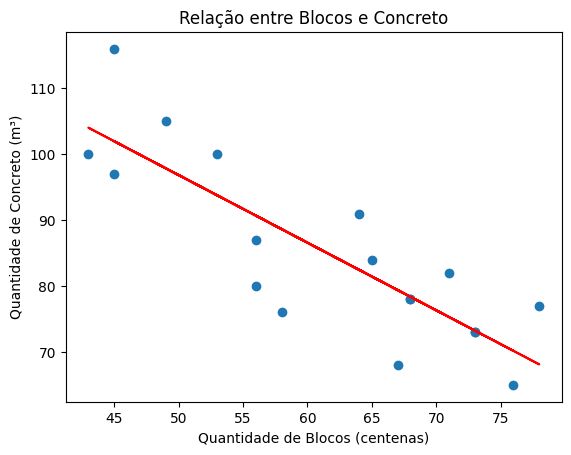

In [18]:
# Modelo de regressão: Concreto = β0 + β1*Blocos
X = df['Blocos_centenas']
y = df['Concreto_m3']
X = sm.add_constant(X)  # Adiciona intercepto
modelo_a = sm.OLS(y, X).fit()
print(modelo_a.summary())

# Gráfico
plt.scatter(df['Blocos_centenas'], df['Concreto_m3'])
plt.plot(df['Blocos_centenas'], modelo_a.predict(X), color='red')
plt.xlabel('Quantidade de Blocos (centenas)')
plt.ylabel('Quantidade de Concreto (m³)')
plt.title('Relação entre Blocos e Concreto')
plt.show()

**b)** Avalie um modelo de regressão do número de blocos com o custo total.

In [19]:
# Preços dados
preco_concreto = 240  # R$/m³
preco_bloco = 560  # R$/milheiro (1000 blocos)

# Como os blocos estão em centenas (100 unidades), ajustamos:
# 1 centena = 100 blocos = 0.1 milheiro
df['Custo_Total'] = (df['Concreto_m3'] * preco_concreto) + (df['Blocos_centenas'] * 0.1 * preco_bloco)

# Modelo de regressão: Custo = β0 + β1*Blocos
X = df['Blocos_centenas']
y = df['Custo_Total']
X = sm.add_constant(X)
modelo_b = sm.OLS(y, X).fit()
print(modelo_b.summary())

                            OLS Regression Results                            
Dep. Variable:            Custo_Total   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     22.29
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           0.000230
Time:                        17:30:35   Log-Likelihood:                -160.12
No. Observations:                  18   AIC:                             324.2
Df Residuals:                      16   BIC:                             326.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.557e+04   2521.134     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


**c)** Qual deve ser a relação mínima entre os preços do concreto e do bloco para que seja viável a substituição?

In [20]:
preco_concreto = 240
relacao_minima = 9.6
preco_max_bloco = relacao_minima * preco_concreto
print(f"Preço máximo do milheiro de blocos para ser viável: R$ {preco_max_bloco:.2f}")

Preço máximo do milheiro de blocos para ser viável: R$ 2304.00


## Conclusões
### Substituição Concreto-Bloco:

Cada 100 blocos reduzem ~0.96 m³ de concreto

A substituição já é vantajosa com os preços atuais (R$ 560/milheiro < R$ 2304/milheiro)

### Custo Total:

O modelo mostra que aumentar blocos eleva o custo, mas isso não considera a redução no concreto

Sugiro modelar o custo em função da proporção blocos/concreto

### Recomendação:

A estratégia de usar mais blocos é viável financeiramente

Pode-se otimizar ainda mais calculando a proporção ideal para cada obra